##### **New York Institute of Technology, Manhattan**

##### Machine Learning (Fall 2022)

----------------------------------------------------------
# **Lung Cancer Prediction** 
---------------------------------------------------------

### Presented by:
* **Luis Valenzuela**



> We selected covid-19 data as our first topic for this project, that's why our pre-analysis and research was submitted on covid-19. Due to unfortunate hurdles with data we pivoted toward lung cancer prediction analysis.

> Project presented in class on December 9, 2022.
----------------


**Lung Cancer Prediction
Notebook Guidelines :**

1. Data Collection (Dataset)/ Importing Libraries
2. Data Cleaning/Data Preprocessing
3. Modelling (Feature Extraction)
  - Hyperpermamters Optimization
    Random Forest
    SVC
    Naive Bayes
    Decision Tree
4. Classification --> Prediction
5. Train and Evaluate the model
6. Comparative Analysis
   - Accurarcy
   - Precision
   - Recall
   - F- Measure
   - Time Taken
7. Finding the best model!


## ETL

In [ ]:
# Dependencies 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import time
import datetime

In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# Store the file of given dataset into a Pandas DataFrame.

source_file = "data/survey lung cancer.csv"
df = pd.read_csv(source_file)
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.shape

(309, 16)

* ^ There are 309 rows and 16 columns.

In [ ]:
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

* ^ There are no null values.

In [ ]:
dup = df[df.duplicated()].shape[0]
print(f"There are {dup} duplicate entries out of {df.shape[0]} entries in this dataset.")

df.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries, there are {df.shape[0]} entries in this dataset.")

There are 33 duplicate entries out of 309 entries in this dataset.

After removing duplicate entries, there are 276 entries in this dataset.


### Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Blues",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

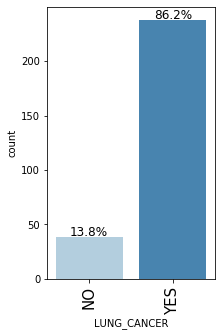

In [ ]:
labeled_barplot(df,"LUNG_CANCER",perc=True)

### Gender Demographics

In [ ]:
df['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
# count all values in gender column

print(df['GENDER'].value_counts())

M    142
F    134
Name: GENDER, dtype: int64


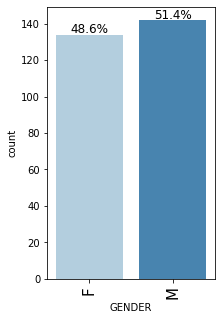

In [ ]:
labeled_barplot(df,"GENDER",perc=True)

In [ ]:
total_females = df['GENDER'].value_counts()['F']
total_males = df['GENDER'].value_counts()['M']
total_males

print('The total number of Females are : ', total_females)
print('The total number of Males are : ', total_males)

The total number of Females are :  134
The total number of Males are :  142


### Age Demographics

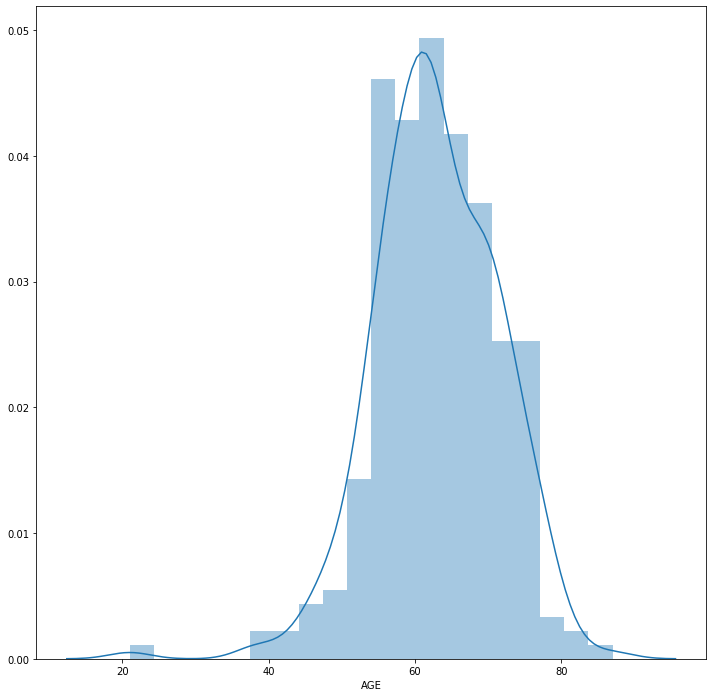

In [ ]:
plt.figure(figsize = (12,12))
sns.distplot(df['AGE'])

In [ ]:
# Figure out the minimum and maximum values for Age column

print('Minimum Age:', df["AGE"].min())
print('Maximum Age:', df["AGE"].max())

Minimum Age: 21
Maximum Age: 87


In [ ]:
# Create bins in which to place values based upon Age column
bins = [20, 30.90, 40.90, 50.90, 60.90, 70.90, 80.90, 100]

# Create labels for these bins
group_labels = ["21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "80+"]

In [ ]:
# Creating a copy of main DataFrame with argument 'deep=True' so it does not affect the original DF.
copy_df = df.copy(deep=True)

In [ ]:
# Place the data series into a new column inside of the DataFrame
copy_df["AGE_GROUP"] = pd.cut(copy_df["AGE"], bins, labels = group_labels)
copy_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,AGE_GROUP
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES,61-70
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES,71-80
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO,51-60
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO,61-70
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO,61-70


### Cancer-Positive Demographics

In [ ]:
# Checking uniques values in 'Lung Cancer' column

df['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
# Creating a seperate DF for people who have diagnosed positive with lung cancer. 

cancer_positive_df = copy_df[copy_df['LUNG_CANCER'] == 'YES']

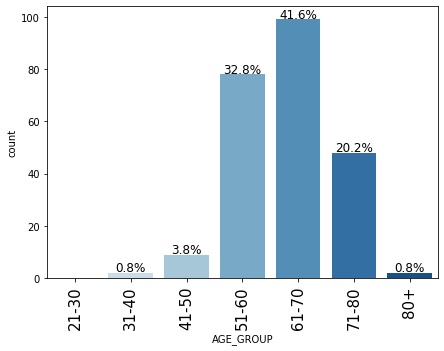

In [ ]:
labeled_barplot(cancer_positive_df,"AGE_GROUP",perc=True)

In [ ]:
cancer_positive_females = cancer_positive_df['GENDER'].value_counts()['F']
cancer_positive_males = cancer_positive_df['GENDER'].value_counts()['M']


print(f"{cancer_positive_females} out of {total_females} females have lung cancer.")

print(f"{cancer_positive_males} out of {total_males} males have lung cancer.")

113 out of 134 females have lung cancer.
125 out of 142 males have lung cancer.


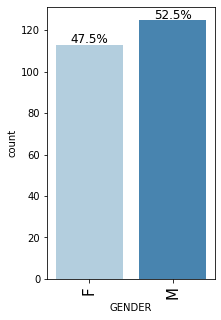

In [ ]:
labeled_barplot(cancer_positive_df,"GENDER",perc=True)

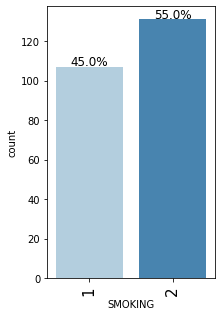

In [ ]:
labeled_barplot(cancer_positive_df,"SMOKING",perc=True)

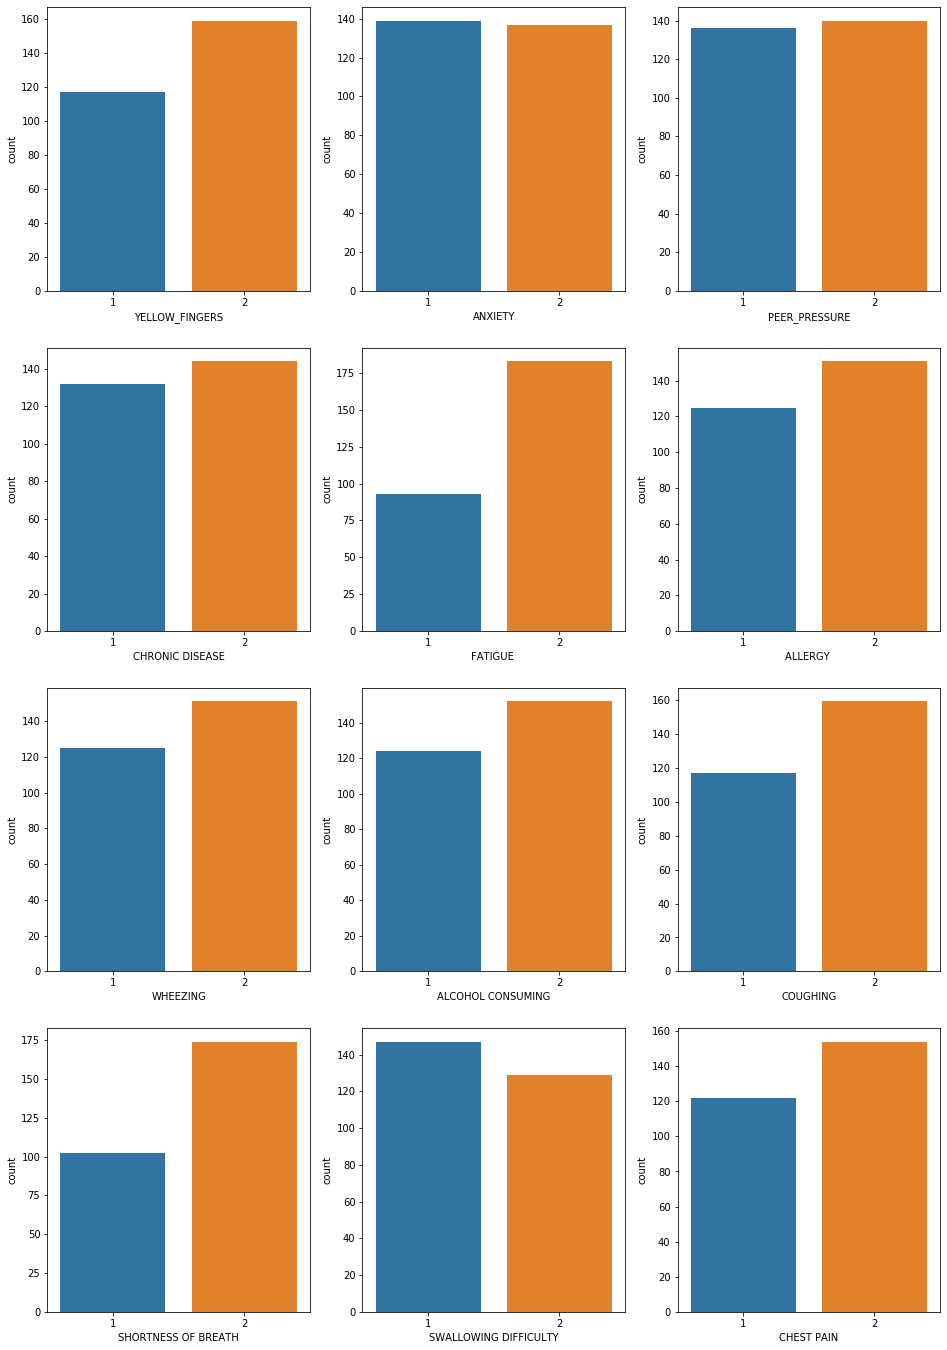

In [ ]:
X = ['YELLOW_FINGERS', 'ANXIETY','PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING','ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',  'SWALLOWING DIFFICULTY', 'CHEST PAIN']
fig, ax = plt.subplots(nrows = 4, ncols = 3) # 16 subplots
fig.set_size_inches(16,24) # set figure size

for i in range(4):
    for j in range(3):
        sns.countplot(x = df[X[3 * i + j]] , ax = ax[i][j]) # count plot

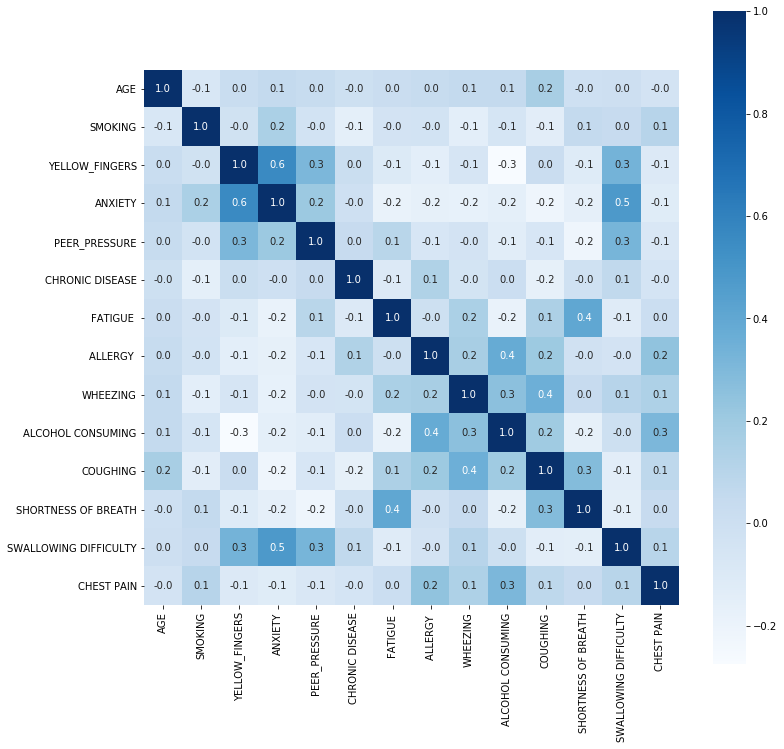

In [ ]:
corr = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='Blues')

In [ ]:
list(df.columns)

['GENDER',
 'AGE',
 'SMOKING',
 'YELLOW_FINGERS',
 'ANXIETY',
 'PEER_PRESSURE',
 'CHRONIC DISEASE',
 'FATIGUE ',
 'ALLERGY ',
 'WHEEZING',
 'ALCOHOL CONSUMING',
 'COUGHING',
 'SHORTNESS OF BREATH',
 'SWALLOWING DIFFICULTY',
 'CHEST PAIN',
 'LUNG_CANCER']

In [ ]:
df["GENDER"] = df["GENDER"].replace({"M":1, "F":0})
df["LUNG_CANCER"] = df["LUNG_CANCER"].replace({"YES":1, "NO":0})
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [ ]:
x = df.drop("LUNG_CANCER", axis = 1)
y = df["LUNG_CANCER"]

acc = pd.DataFrame(columns=['Model','Train Time','Accuracy'])

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


### Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
t0=time.time()
gnb.fit(x_train, y_train)
train_time = round(time.time()-t0, 3)
gnb_pred = gnb.predict(x_test)
gnb_conf = confusion_matrix(y_test, gnb_pred)
gnb_report = classification_report(y_test, gnb_pred)
gnb_acc = round(accuracy_score(y_test, gnb_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{gnb_conf}")
print(f"\nClassification Report : \n\n{gnb_report}")
print(f"\nThe Accuracy of Gaussian Naive Bayes is {gnb_acc} %")
acc.loc[0] = ['GaussianNB',train_time, gnb_acc]

Confusion Matrix : 

[[ 8  4]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56


The Accuracy of Gaussian Naive Bayes is 91.07 %


### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
t0=time.time()
svm.fit(x_train, y_train)
train_time = round(time.time()-t0, 3)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")
acc.loc[1] = ['SVC',train_time,  svm_acc]

Confusion Matrix : 

[[ 9  3]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        12
           1       0.94      1.00      0.97        44

    accuracy                           0.95        56
   macro avg       0.97      0.88      0.91        56
weighted avg       0.95      0.95      0.94        56


The Accuracy of Support Vector Machine is 94.64 %


### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from functools import reduce     

estimator = [10,50,100,500,1000,5000] #estimate values
features = ['auto', 'sqrt'] #feature values
rf_accuracy_auto = [] # Empty array to store the Accuracy score
rf_accuracy_sqrt = []
acc_RF = pd.DataFrame(columns=['estimator','Train Time'])
print('Random Forest Classification model','\n')


for i in (features): #for loop for feature selection
    print('Random Forest model with Feature:',i,'\n')
    for k,j in enumerate(estimator): #for loop for estimator selection
      rfg = RandomForestClassifier(n_estimators=j, max_features=i, random_state = 42) 
      t0=time.time()
      rfg.fit(x_train, y_train)
      train_time = round(time.time()-t0, 3)
      rfg_pred = rfg.predict(x_test)
      rfg_conf = confusion_matrix(y_test, rfg_pred)
      rfg_report = classification_report(y_test, rfg_pred)
      rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
      print('Classification Accuracy with ',j,' estimators:', rfg_acc, "\n")
      print(f"Confusion Matrix : \n\n{rfg_conf}")
      print(f"\nClassification Report : \n\n{rfg_report}")
      print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")
      acc_RF.loc[k] = [j,train_time]
      if i == 'sqrt':
          rf_accuracy_sqrt.append(rfg_acc) #store the accuracy score if feature is squrt
      else:
          rf_accuracy_auto.append(rfg_acc) #store the accuracy score if feature is auto

acc.loc[2] = ['RandomForestClassifier',train_time, rfg_acc]
accuracy1 = pd.DataFrame(rf_accuracy_sqrt,columns = ['accuracy_sqrt'])
accuracy2 = pd.DataFrame(rf_accuracy_auto,columns = ['accuracy_auto'])
accuracy_rf = pd.merge(accuracy1,accuracy2,left_index=True,right_index=True)
rf = pd.merge(acc_RF,accuracy_rf,left_index=True,right_index=True)
print(rf)

Random Forest Classification model 

Random Forest model with Feature: auto 

Classification Accuracy with  10  estimators: 89.29 

Confusion Matrix : 

[[ 7  5]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.93        44

    accuracy                           0.89        56
   macro avg       0.89      0.78      0.82        56
weighted avg       0.89      0.89      0.88        56


The Accuracy of Random Forest Classifier is 89.29 %
Classification Accuracy with  50  estimators: 87.5 

Confusion Matrix : 

[[ 5  7]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
K = [2,3,4,5,6,7,8]
acc_KNN = pd.DataFrame(columns=['K_value','Train Time','Accuracy'])
for i,k in enumerate(K):
  knn = KNeighborsClassifier(n_neighbors=k)
  t0=time.time()
  knn.fit(x_train, y_train)
  train_time = round(time.time()-t0, 3)
  knn_pred = knn.predict(x_test)
  knn_conf = confusion_matrix(y_test, knn_pred)
  knn_report = classification_report(y_test, knn_pred)
  knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
  print(f"Confusion Matrix : \n\n{knn_conf}")
  print(f"\nClassification Report : \n\n{knn_report}")
  print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")
  acc_KNN.loc[i] = [k,train_time,  knn_acc]

accuracy1 = pd.DataFrame(rf_accuracy_sqrt,columns = ['accuracy_sqrt'])
acc.loc[3] = ['KNeighborsClassifier',train_time,  knn_acc]
print(acc_KNN)

Confusion Matrix : 

[[12  0]
 [ 2 42]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.95      0.98        44

    accuracy                           0.96        56
   macro avg       0.93      0.98      0.95        56
weighted avg       0.97      0.96      0.97        56


The Accuracy of K Nearest Neighbors Classifier is 96.43 %
Confusion Matrix : 

[[ 6  6]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.88      0.98      0.92        44

    accuracy                           0.88        56
   macro avg       0.87      0.74      0.78        56
weighted avg       0.87      0.88      0.86        56


The Accuracy of K Nearest Neighbors Classifier is 87.5 %
Confusion Matrix : 

[[ 7  5]
 [ 1 43]]

Classification Report : 

              precision    r

### Decision Trees

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
# We define the model
dtcla = DecisionTreeClassifier(random_state= 42)
t0=time.time()
#We train the model
dtcla.fit(x_train, y_train)
train_time = round(time.time()-t0, 3)
#We predict target values
dtcla_pred = dtcla.predict(x_test)
# The confusion matrix
dtcla_conf = confusion_matrix(y_test, dtcla_pred)

dtcla_report = classification_report(y_test, dtcla_pred)
dtcla_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)

print(f"Confusion Matrix : \n\n{dtcla_conf}")
print(f"\nClassification Report : \n\n{dtcla_report}")
print(f"\nThe Accuracy of Decision Tree Classifier is {dtcla_acc} %")
acc.loc[4] = ['DecisionTreeClassifier', train_time, dtcla_acc]

Confusion Matrix : 

[[ 7  5]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.90      0.98      0.93        44

    accuracy                           0.89        56
   macro avg       0.89      0.78      0.82        56
weighted avg       0.89      0.89      0.88        56


The Accuracy of Decision Tree Classifier is 89.29 %


### Conclusion

In [ ]:
acc

,Model,Train Time,Accuracy
0,GaussianNB,0.002,91.07
1,SVC,0.003,94.64
2,RandomForestClassifier,8.189,85.71
3,KNeighborsClassifier,0.001,89.29
4,DecisionTreeClassifier,0.002,89.29


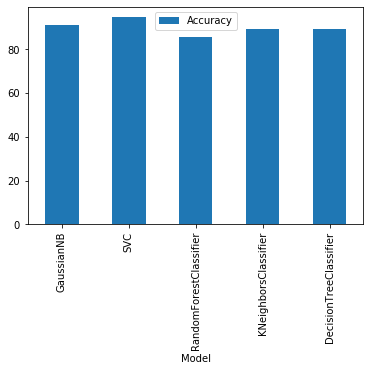

In [ ]:
ax = acc.plot.bar(x='Model', y='Accuracy', rot=90)
ax.yaxis.set_tick_params(pad = 5)

### Thank you!